In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from joblib import dump, load
from sklearn.model_selection import train_test_split

In [24]:
models = [RandomForestClassifier(),LogisticRegression(),svm.SVC(),]

> Learning Curves for base models

In [30]:
X_train = pd.read_csv("./Training_Set.csv")
X_test = pd.read_csv("./Testing_Set .csv")
y_train = pd.read_csv("./y_train.csv")
y_test = pd.read_csv("./y_test.csv")
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(644, 19) (162, 19)
(644,) (162,)


> Initializing Base Models

In [31]:
models = [RandomForestClassifier(),LogisticRegression(),svm.SVC(),DecisionTreeClassifier()]

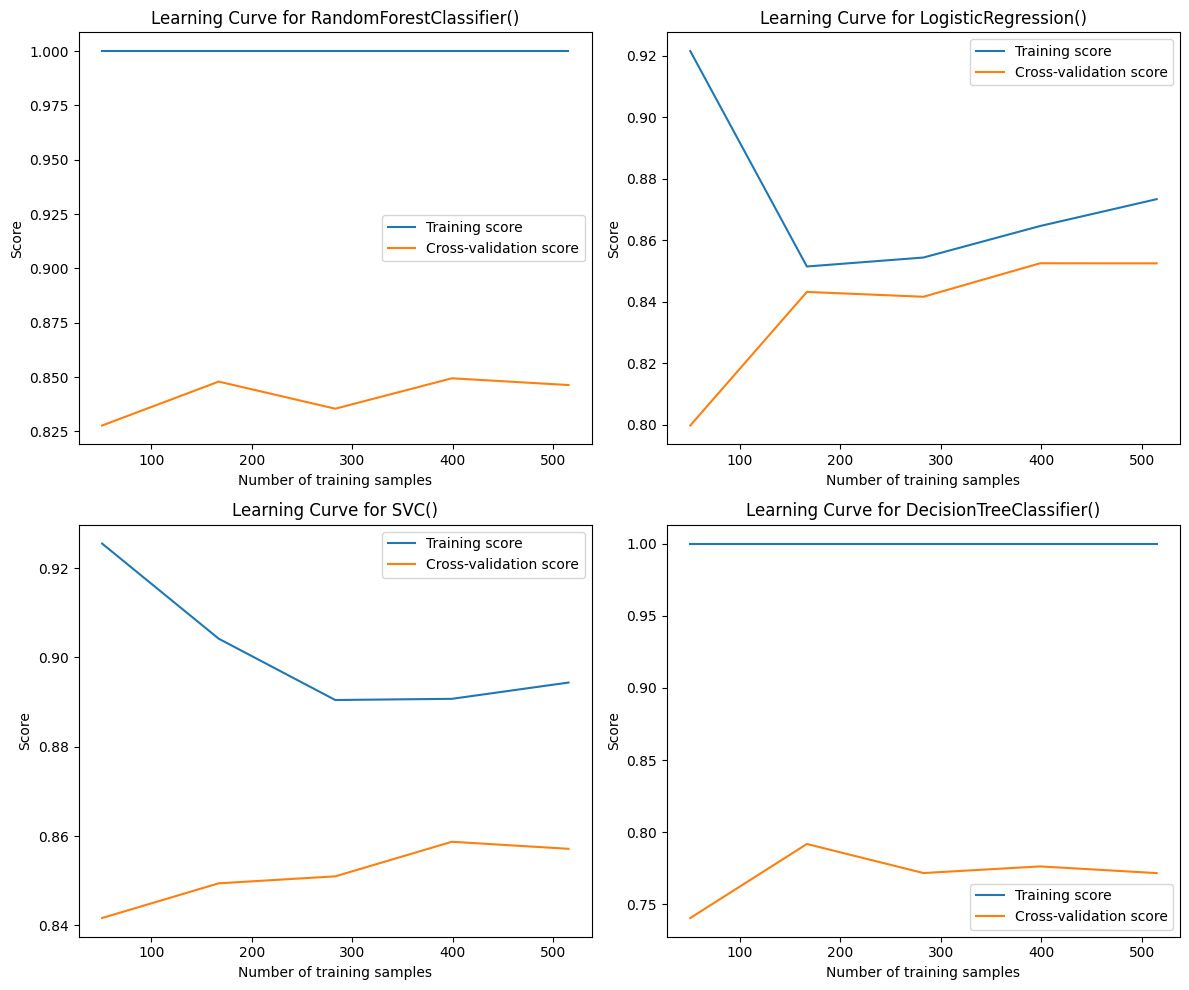

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, model in enumerate(models):
    row = i // 2
    col = i % 2

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax = axes[row, col]
    ax.plot(train_sizes, train_scores_mean, label='Training score')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score')
    ax.set_xlabel('Number of training samples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {type(model).__name__}')
    ax.legend()

plt.tight_layout()
plt.show()

Testing scores for Test sets

In [33]:
acc_score = []
roc_score = []
prec_score = []

f1h = []
name_model = []
for model in models:

  model.fit(X_train, y_train)
  # Setting the Prediction value form the RandomForest
  y_pred = model.predict(X_test)

  # Testing the accuracy of the Model
  acc_score.append(accuracy_score(y_test, y_pred))

  # Testing the ROC
  roc_score.append(roc_auc_score(y_test, y_pred))

  # Testing the F1 score

  f1h.append(f1_score(y_test, y_pred))

  # Adding model name
  name_model.append(type(model).__name__)

# Create a DataFrame to store the results
result = pd.DataFrame({
    'Model Name': name_model,
    'accuracy': acc_score,
    'roc_auc': roc_score,
    'f1Score': f1h
})

result

,Model Name,accuracy,roc auc,f1Score
0,RandomForestClassifier,0.833333,0.831960,0.843931
1,LogisticRegression,0.851852,0.851190,0.858824
2,SVC,0.858025,0.856227,0.868571
3,DecisionTreeClassifier,0.796296,0.795330,0.807018


> As we can see here Both base models Decision tree and RandomForestClassifier is overfitting and LogisticRegression And SVMs are not.(Gap between the two lines)

Models after improvement by each team member

In [42]:
models = [RandomForestClassifier(max_depth=10, min_samples_split=10,ccp_alpha=0.01),LogisticRegression(C=4832.930238571752, class_weight='balanced', tol=0.003),svm.SVC(C=0.1, gamma=1, kernel='linear'),DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42)]

In [ ]:
model1 = LogisticRegression(C=4832.930238571752, class_weight='balanced', tol=0.003)
model1.fit(X_train y_train)
print(model1_coef)

> Plotting the learning curves for each

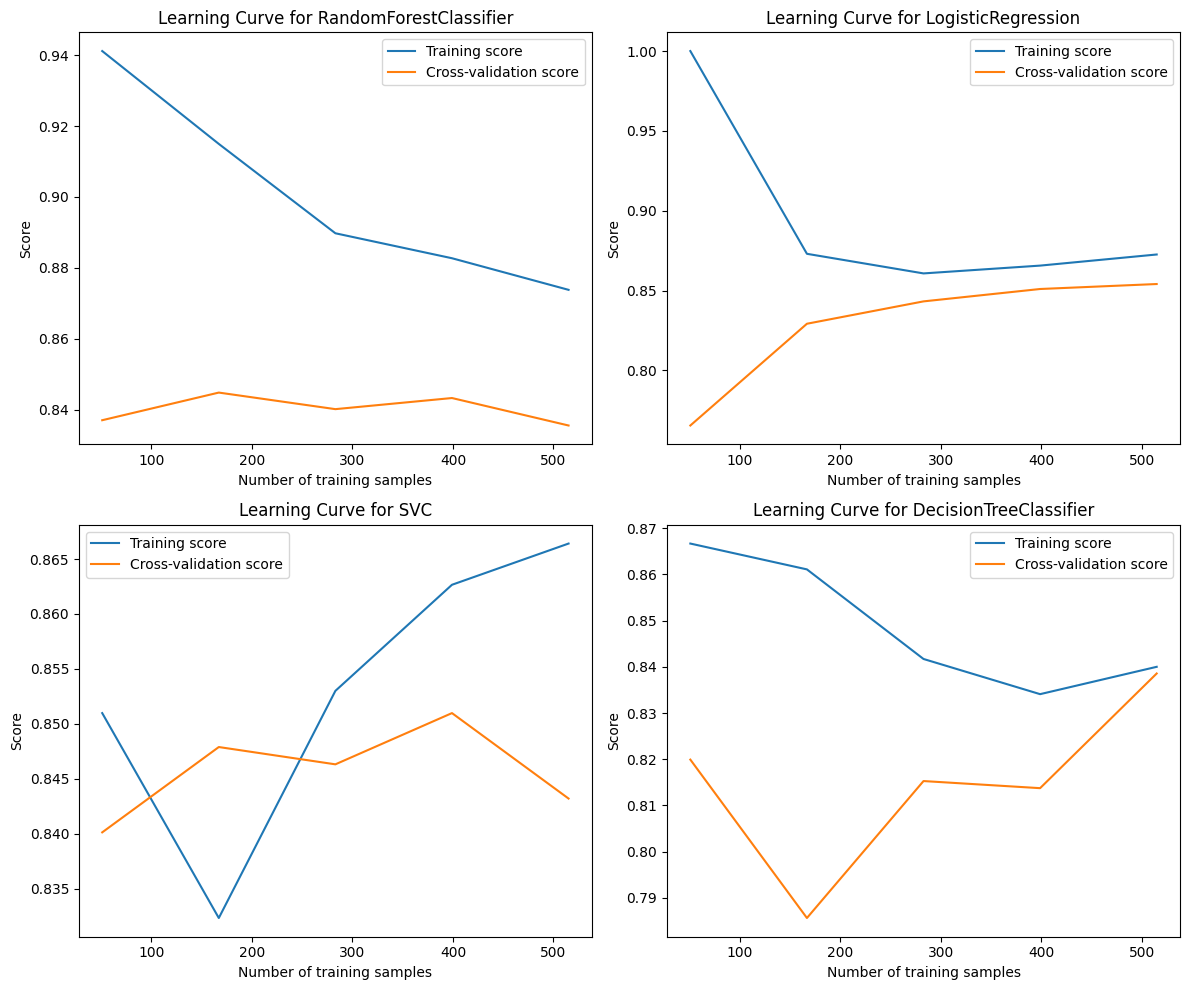

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, model in enumerate(models):
    row = i // 2
    col = i % 2

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax = axes[row, col]
    ax.plot(train_sizes, train_scores_mean, label='Training score')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score')
    ax.set_xlabel('Number of training samples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {type(model).__name__}')
    ax.legend()

plt.tight_layout()
plt.show()

> Scoring of optimized models

In [44]:
acc_score = []
roc_score = []
prec_score = []

f1h = []
name_model = []
for model in models:

  model.fit(X_train, y_train)
  # Setting the Prediction value form the RandomForest
  y_pred = model.predict(X_test)

  # Testing the accuracy of the Model
  acc_score.append(accuracy_score(y_test, y_pred))

  # Testing the ROC
  roc_score.append(roc_auc_score(y_test, y_pred))

  # Testing the F1 score
  f1h.append(f1_score(y_test, y_pred))

  # Adding model name
  name_model.append(type(model).__name__)

# Create a DataFrame to store the results
result = pd.DataFrame({
    'Model Name': name_model,
    'accuracy': acc_score,
    'roc_auc': roc_score,
    'f1Score': f1h
})

result

,Model Name,accuracy,roc_auc,f1Score
0,RandomForestClassifier,0.814815,0.812271,0.831461
1,LogisticRegression,0.864198,0.864469,0.867470
2,SVC,0.839506,0.838370,0.848837
3,DecisionTreeClassifier,0.820988,0.822344,0.819876


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, min_samples_split=10, ccp_alpha=0.01)
rf.fit(X_train, y_train)

rf_feature_importances = rf.feature_importances_

print("Random Forest Feature Importances:")
for i, importance in enumerate(rf_feature_importances):
    print(f"Feature {i}: {importance}")


Random Forest Feature Importances:
Feature 0: 0.03400389561299016
Feature 1: 0.0016825903197025518
Feature 2: 0.02790438639424082
Feature 3: 0.07750491096247888
Feature 4: 0.12754463976846156
Feature 5: 0.05225442212170796
Feature 6: 0.016775137568313357
Feature 7: 0.0013377805383438107
Feature 8: 0.0008121610272778773
Feature 9: 0.00012896073764694918
Feature 10: 0.19543973872420267
Feature 11: 0.27019169946120397
Feature 12: 0.008312271851583826
Feature 13: 0.0017925490316560678
Feature 14: 0.004678829892243533
Feature 15: 0.0017861658749788259
Feature 16: 0.00028813481724554636
Feature 17: 0.03973918734666666
Feature 18: 0.13782253794905494


In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=4832.930238571752, class_weight='balanced', tol=0.003)
log_reg.fit(X_train, y_train)


log_reg_coef = log_reg.coef_[0]

print("Logistic Regression Coefficients:")
for i, coef in enumerate(log_reg_coef):
    print(f"Feature {i}: {coef}")


Logistic Regression Coefficients:
Feature 0: 2.756884517337736
Feature 1: 1.0641991899530583
Feature 2: -4.645209294018694
Feature 3: -0.17597049480197585
Feature 4: 2.541760911910278
Feature 5: -2.106117478237451
Feature 6: -1.9609030264218714
Feature 7: -1.604831410328882
Feature 8: -0.005649803591369804
Feature 9: 0.05061822576422682
Feature 10: 0.7622482763268015
Feature 11: -1.5532900342475726
Feature 12: 0.7171521975465542
Feature 13: -0.5189530974261786
Feature 14: 0.8754345838289501
Feature 15: -0.4776439960059404
Feature 16: -0.1336339857775107
Feature 17: 1.6199197862879862
Feature 18: 1.0053928854155014


In [47]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(criterion="entropy",
                              splitter="best",
                              max_depth=3,
                              min_samples_split=4,
                              min_samples_leaf=2,
                              max_features="sqrt",
                              random_state=42)
tree.fit(X_train, y_train)


tree_feature_importances = tree.feature_importances_

print("Decision Tree Feature Importances:")
for i, importance in enumerate(tree_feature_importances):
    print(f"Feature {i}: {importance}")


Decision Tree Feature Importances:
Feature 0: 0.09606108477974791
Feature 1: 0.01091071209872005
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.03682147977609821
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.7215978251301619
Feature 12: 0.024323971890351428
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.08346212250164235
Feature 18: 0.026822803823278007
